In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [29]:
#returns a dataframe that includes all the events happened in 'year' since 2009 - 2010
def event_data(year):
    return(pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/PlayByPlay_{}/Events_{}.csv'.format(year,year)))
# Returns a dataframe with variables playerid, teamid and playerName since 2009-2010.
def player_data(year):
    return pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/PlayByPlay_{}/Players_{}.csv'.format(year,year))
player_data(2015).head()

,PlayerID,Season,TeamID,PlayerName
0,626432,2015,1101,ALBRIGHT_CHRISTIAN
1,626433,2015,1101,COOKE_AUSTIN
2,626434,2015,1101,GRANT_MICHAEL
3,626435,2015,1101,GREEN_DRAKE
4,626436,2015,1101,HANSON_DAVID


In [31]:
event_data(2015).head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,12703749,2015,11,1103,1420,0,0,19,1103,626476,miss3_jump
1,12703750,2015,11,1103,1420,0,0,19,1420,631228,reb_def
2,12703751,2015,11,1103,1420,0,0,27,1420,631233,assist
3,12703752,2015,11,1103,1420,0,2,27,1420,631230,made2_dunk
4,12703753,2015,11,1103,1420,2,2,59,1103,626468,made2_jump


 __[For detailed explanations of the datasets: Link to Kaggle](https://www.kaggle.com/c/mens-machine-learning-competition-2018/data)__

In [22]:
#This file identifies the different college teams present in the dataset.
teams = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/Teams.csv')
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [21]:
#This file identifies the different seasons included in the historical data,
#along with certain season-level properties.
seasons = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/Seasons.csv')
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [32]:
# This file identifies the seeds for all teams in each NCAA® tournament, for all seasons of historical data.
seeds = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/NCAATourneySeeds.csv')
seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [33]:
#This file identifies the game-by-game results for many seasons of historical data, starting with the 1985 season
reg_season_cpt = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/RegularSeasonCompactResults.csv')
reg_season_cpt.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [34]:
#This file identifies the game-by-game NCAA® tournament results for all seasons of historical data.
tour_results = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/NCAATourneyCompactResults.csv')
tour_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [37]:
#This file provides team-level box scores for many regular seasons of historical data, starting with the 2003 season. 
seas_detail = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/RegularSeasonDetailedResults.csv')
seas_detail.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [40]:
seas_detail.shape

(76636, 34)

In [38]:
#This file provides team-level box scores for many NCAA® tournaments, starting with the 2003 season.
tour_detail = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/NCAATourneyDetailedResults.csv')
tour_detail.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [41]:
tour_detail.shape

(981, 34)

In [42]:
#This file indicates the Division I conferences that have existed over the years since 1985.
conferences = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/Conferences.csv')
conferences.head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [11]:
#This file indicates the conference affiliations for each team during each season. 
#Some conferences have changed their names from year to year, and/or changed which teams are part of the conference.
#This file tracks this information historically.

team_conferences = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/TeamConferences.csv')


In [52]:
#This file indicates the head coach for each team in each season, 
#including a start/finish range of DayNums to indicate a mid-season coaching change. 
coaches = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/TeamCoaches.csv')
coaches.head()


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney


### Most Succesfull Coach?

In [54]:
# Let's find the coaches changes teams during the season
coaches[(coaches['FirstDayNum'] != 0)|(coaches['LastDayNum'] != 154)];

In [130]:
# Let's see the coaches and the number of teams they worked for.
coaches.groupby(['CoachName']).TeamID.unique(); # this will give the list of teams for each coach and the teams they have worked.
coaches.groupby(['CoachName', 'TeamID']).Season.count(); # number of seasons a coach worked for a team.

### Most Succesfull Teams? By Number of Champs

In [13]:
champ_count = tour_results[tour_results['DayNum'] == 154].WTeamID.value_counts()

champ_teams = teams[teams.TeamID.isin(list(champ_count.index))][['TeamID','TeamName']]
champ_teams['no_champs'] = champ_teams.TeamID.map(champ_count)
Champ_Teams = champ_teams.sort_values(by = 'no_champs', ascending = False)


# Most Succesfull Team? By Average seed:

In [14]:
def TeamID_to_Tname(series_TeamID):
    series_teamname = teams.set_index('TeamName').TeamID.map(series_TeamID).sort_values(ascending = False)
    return series_teamname
def PlayerID_to_TeamID(list_PlayerID, season):
    team_player = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/PlayByPlay_{}/Players_{}.csv'.format(season,season))
    teamID = team_player[team_player.isin(list_PlayerID)]
    return teamID

In [15]:
seeds['Seed'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
seeds['Seed_Numeric'] = pd.to_numeric(seeds.Seed)
Seed_Means = seeds.groupby('TeamID').Seed_Numeric.mean();

In [16]:
Seeds_Teams = teams[teams.TeamID.isin(list(Seed_Means.index))][['TeamID','TeamName']]
# Seeds_Teams['avg_seeds'] = Seeds_Teams.TeamID.map(Seed_Means)
# Seed_Teams_15 = Seeds_Teams.sort_values(by = 'avg_seeds', ascending = True)[0:16]
# Seed_Teams_15[['TeamName', 'avg_seeds']].plot.bar(x = 'TeamName')



In [17]:
Seed_Best = seeds[seeds['Seed_Numeric']==1].TeamID.value_counts()
Seeds_Best_Teams = teams[teams.TeamID.isin(list(Seed_Best.index))][['TeamID','TeamName']]
Seeds_Best_Teams['No_first_seed'] = Seeds_Best_Teams.TeamID.map(Seed_Best)
Seeds_Best_Teams = Seeds_Best_Teams.sort_values( by = 'No_first_seed', ascending = False)[0:14]



In [18]:
def create_game_stats(events):
    # Day number, winning team id and losing team id uniquely determines the game id
    col = events['DayNum'].astype(str) + "_" + events['WTeamID'].astype(str) + "_" + events['LTeamID'].astype(str)
    events['GameID'] = col
    # new column indicating the winning team
    events.EventTeamID = (events.WTeamID == events.EventTeamID)
    events.EventTeamID = events.EventTeamID.astype(int)

    g = events.groupby(['GameID', 'EventTeamID', 'EventType']).agg({'EventType': 'count'})
    us = g.unstack(['EventTeamID', 'EventType'], fill_value=0)

    return us.sort_index(axis=1)

In [19]:
season_wins = reg_season_cpt['WTeamID']
s1 = season_wins.value_counts()

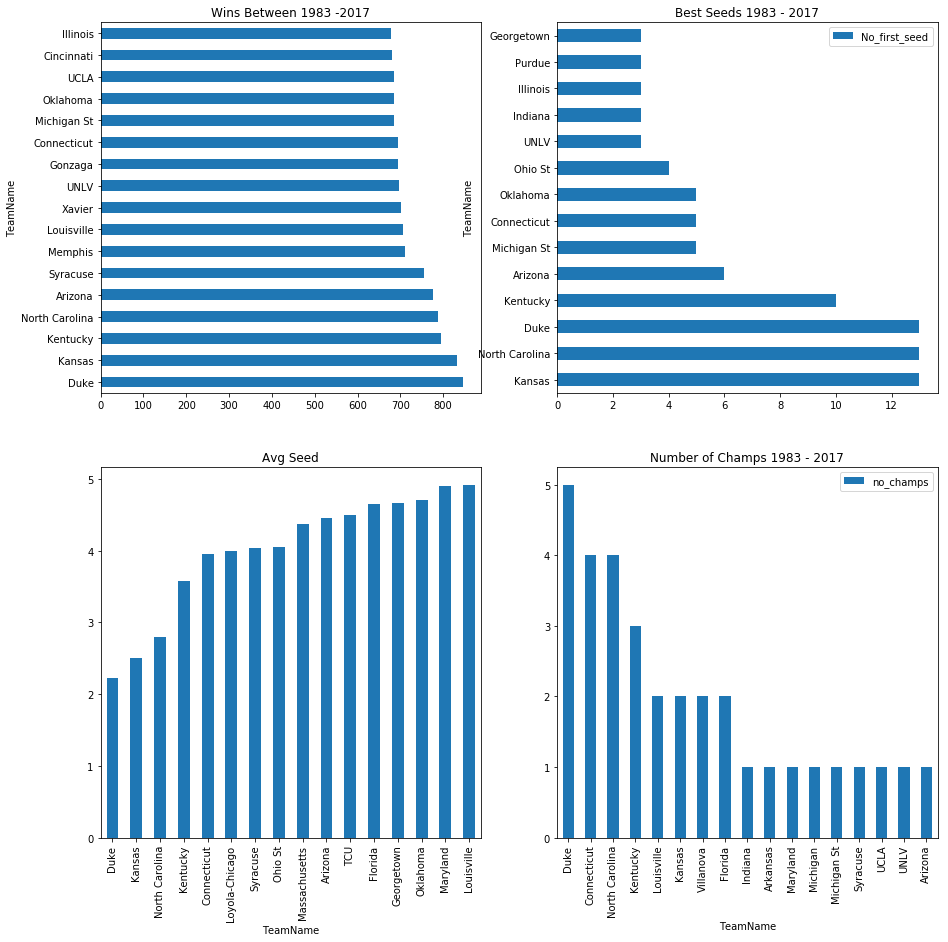

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

f = fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15))
f11 = TeamID_to_Tname(s1)[0:17].plot.barh(ax = ax1)
f11.set_title('Wins Between 1983 -2017')
f12 = Seeds_Best_Teams[['TeamName', 'No_first_seed']].plot.barh(ax = ax2, x = 'TeamName')
f12.set_title('Best Seeds 1983 - 2017')
f21 = TeamID_to_Tname(Seed_Means).sort_values(ascending = True)[0:16].plot.bar(ax = ax3, x = 'TeamName')
f21.set_title('Avg Seed')
f22 = Champ_Teams[['no_champs','TeamName']].plot.bar(ax = ax4, x = 'TeamName')
f22.set_title('Number of Champs 1983 - 2017')

# Here we want to predict game result